In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn

from scipy.stats import pearsonr, spearmanr

import os

from env import user, host, password
import acquire
import prepare
import explore
import wrangle

# 1 <br>
Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [ ]:
# Acquire the data
df = acquire.get_telco_data()
df.head()

In [ ]:
# Prepare the data
prepare.prep_telco(df)
df.head()

In [ ]:
# Increase the size of the figure to prevent overlapping
plt.figure(figsize=(12, 3))

# Create loop that will make all the histograms
cols = [col for col in df.columns]
for i, col in enumerate(cols):
    
    # i starts at 0, and counts each loop
    plot_number = i + 1
    
    # Create subplots
    plt.subplot(1, len(cols), plot_number) # <- row, columns, index
    
    # Create titles for subplots
    plt.title(col)
    
    #Create histograms for the subplots
    df[col].hist(bins=5)
    
    # Hide the grid in the subplots
    plt.grid(False)
    
    

In [ ]:
# Increase the size of the figure to prevent overlapping
plt.figure(figsize=(12, 3))

# Create loop that will make all the histograms
cols = [col for col in df.columns]
for i, col in enumerate(cols):
    
    # i starts at 0, and counts each loop
    plot_number = i + 1
    
    # Create subplots
    plt.subplot(1, len(cols), plot_number) # <- row, columns, index
    
    # Create titles for subplots
    plt.title(col)
    
    #Create histograms for the subplots
    sns.boxplot(data = df[[col]])
    
    # Hide the grid in the subplots
    plt.grid(False)

In [ ]:
# Split the data
train, validate, test = prepare.telco_split(df)
train.shape, validate.shape, test.shape

In [ ]:
train.head()

In [ ]:
plt.figure(figsize=(8,6))
# The mask argument calls an np heatmap to extract a lower triangle from
sns.heatmap(train, cmap='Blues', annot=True, linewidth=0.5)

# 2  <br>
Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
def plot_variable_pairs(df):
    sns.pairplot(train,hue = 'churn',kind = "reg",palette = "magma")

In [ ]:
plot_variable_pairs(train)

# 3 <br>
Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [ ]:
def months_to_years(df):
    tenure_years = (df.tenure / 12)
    df['tenure_years'] = tenure_years.round()
    
    return df

In [ ]:
months_to_years(train).head()

# 4 <br>
Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
def plot_categorical_and_continuous_vars(df, cont_vars, cat_vars):
    
    def plot_swarm(train, churn, cont_var):
        average = train[cont_var].mean()
        p = sns.swarmplot(data=train, x='churn', y=cont_var, color='lightgray')
        p = plt.title(cont_var)
        p = plt.axhline(average, ls='--', color='black')
        return p
    
    def plot_cat_by_target(train, target, cat_var):
        p = plt.figure(figsize=(2,2))
        p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
        #overall_rate = train['churn'].mean()
        #p = plt.axhline(overall_rate, ls='--', color='gray')
        return p
    
    def catplot(train):
        sns.catplot(x="payment_type", y="tenure", hue="churn", aspect=2,
            kind="swarm", data=train, palette = 'magma')
        plt.show()
        
      
    def barplot(train):
        g = sns.catplot(x="payment_type", y="monthly_charges", hue="churn", kind="bar", data=train)
        g.set_xticklabels(rotation=30)
    
    
    def distplot(train):
        sns.distplot(train.monthly_charges)
        
    plot_swarm(df, cont_vars, cat_vars)
    
    plot_cat_by_target(df, 'churn', cat_vars)
    
    catplot(train)
    
    barplot(train)

In [ ]:
plot_categorical_and_continuous_vars(train, 'monthly_charges', 'tenure')

# 5 <br>
Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
explore.plot_categorical_and_continuous_vars(train, 'monthly_charges', 'tenure')

# 6 <br>
Explore your dataset with any other visualizations you think will be helpful. <br>
This has already been done in previous cells.

# Exercises II - Challenge

Our Zillow scenario continues: <br>

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017. <br>

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

# 1 <br>
Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [2]:
# Acquire the zillow data
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
# Prepare the zillow data
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [4]:
train, validate, test = wrangle.wrangle_split(df)
train.shape, validate.shape, test.shape

((1459448, 7), (625478, 7), (416986, 7))

In [5]:
train.head()

,bedrooms,bathrooms,area_sqft,tax_value,year_built,tax_amount,fips
1979346,4.0,2.5,2068.0,492072.0,1989.0,5812.96,6059.0
1948908,4.0,2.5,1950.0,142946.0,1977.0,1605.92,6111.0
1606731,4.0,2.0,1713.0,290100.0,1994.0,4225.23,6037.0
1408008,3.0,1.5,1458.0,456000.0,1955.0,5285.24,6059.0
292925,2.0,2.0,971.0,202309.0,1984.0,2932.34,6037.0


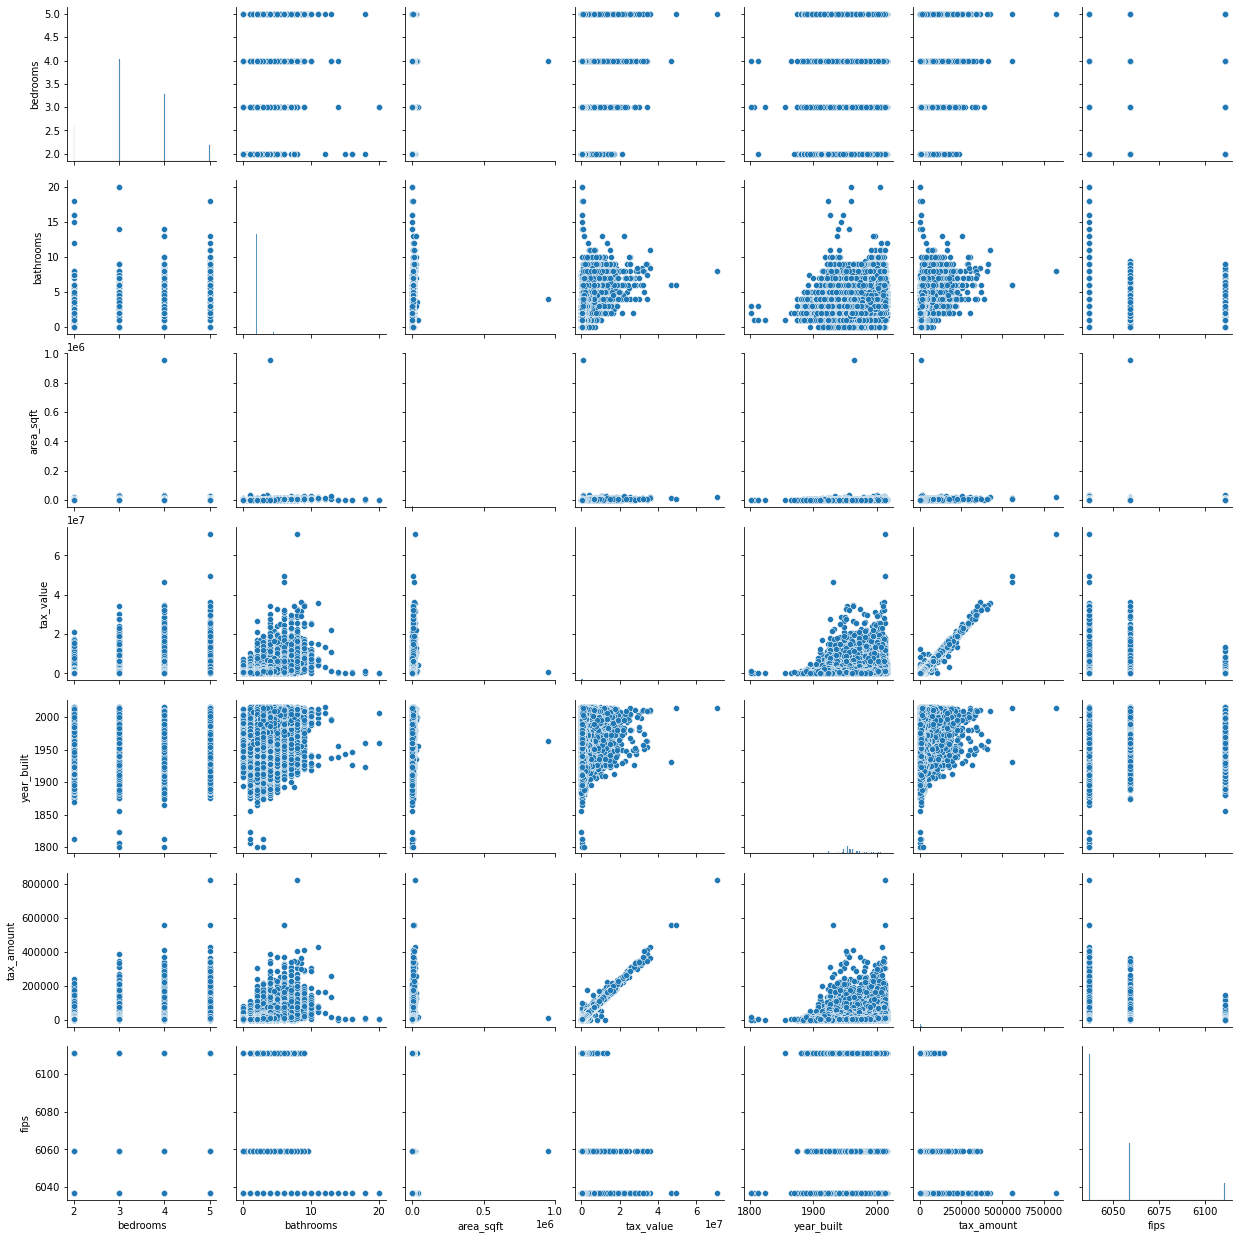

In [7]:
sns.pairplot(train)

In [7]:
cat_vars = ['bedrooms', 'bathrooms', 'fips', 'year_built']
cont_vars = ['area_sqft', 'tax_value','tax_amount']

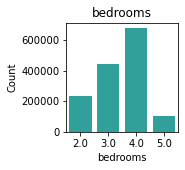

     bedrooms   Count  Percent
3.0       4.0  675724    46.30
4.0       3.0  444135    30.43
2.0       2.0  234303    16.05
5.0       5.0  105286     7.21
_________________________________________________________________


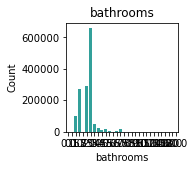

       bathrooms   Count  Percent
2.00        2.50  658794    45.14
3.00        2.00  290274    19.89
1.00        1.50  274310    18.80
2.50        1.00   99757     6.84
4.00        3.00   52517     3.60
1.50        3.50   21763     1.49
3.50        4.50   19438     1.33
5.00        6.50   16884     1.16
4.50        4.00   13003     0.89
6.00        5.00    5557     0.38
5.50        6.00    3866     0.26
7.00        7.50    1568     0.11
0.00        5.50     534     0.04
6.50        7.00     471     0.03
8.00        0.00     402     0.03
7.50        9.00     115     0.01
9.00       11.00     110     0.01
10.00       8.00      32     0.00
8.50        8.50      24     0.00
11.00      18.00       9     0.00
13.00      10.00       3     0.00
0.50        9.50       3     0.00
9.50       14.00       2     0.00
14.00      20.00       2     0.00
16.00       0.50       2     0.00
20.00      12.00       2     0.00
18.00       1.75       2     0.00
12.00      16.00       2     0.00
15.00      13.

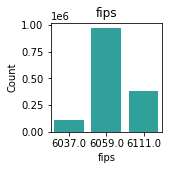

          fips   Count  Percent
6037.0  6059.0  969201    66.41
6059.0  6111.0  377707    25.88
6111.0  6037.0  112540     7.71
_________________________________________________________________


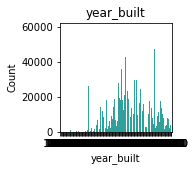

        year_built  Count  Percent
1955.0      1989.0  59361     4.07
1950.0      1977.0  49193     3.37
1954.0      1994.0  47707     3.27
1953.0      1955.0  43192     2.96
1956.0      1984.0  42984     2.95
...            ...    ...      ...
1855.0      1879.0      1     0.00
1865.0      1865.0      1     0.00
1823.0      1881.0      1     0.00
1876.0      1874.0      1     0.00
1807.0      1870.0      1     0.00

[148 rows x 3 columns]
_________________________________________________________________


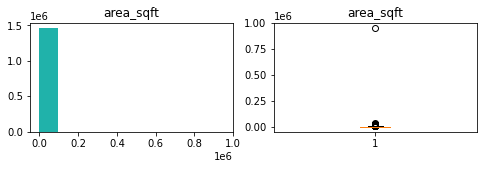

count    1.459448e+06
mean     1.838020e+03
std      1.169243e+03
min      1.000000e+00
25%      1.264000e+03
50%      1.620000e+03
75%      2.183000e+03
max      9.525760e+05
Name: area_sqft, dtype: float64


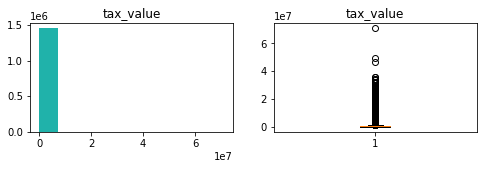

count    1.459448e+06
mean     4.463868e+05
std      5.709014e+05
min      1.000000e+00
25%      1.896350e+05
50%      3.273170e+05
75%      5.300000e+05
max      7.106750e+07
Name: tax_value, dtype: float64


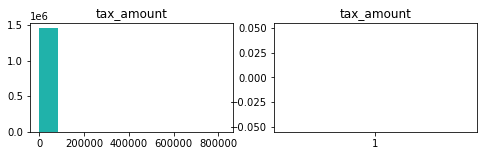

count    1.457891e+06
mean     5.450792e+03
std      6.525460e+03
min      1.648000e+01
25%      2.550130e+03
50%      4.101920e+03
75%      6.359935e+03
max      8.241669e+05
Name: tax_amount, dtype: float64


In [10]:
explore.explore_univariate(train, cat_vars, cont_vars)

bathrooms 
_____________________

            chi2  p-value  degrees of freedom
0  838183.915602      0.0                  87

observed:
 bedrooms      2.0     3.0     4.0     5.0      All
bathrooms                                         
0.0           105     209     169      51      534
0.5             3       0       0       0        3
1.0        152296  114620    6626     768   274310
1.5          4475   14048    3067     173    21763
1.75            0       1       0       0        1
2.0         65613  401450  179126   12605   658794
2.5          4068   44503   46645    4541    99757
3.0          6785   85934  155428   42127   290274
3.5           293    4294   10962    3889    19438
4.0           533    8265   26409   17310    52517
4.5            44     944    6030    5985    13003
5.0            56    1103    6907    8818    16884
5.5             1     102     785    2978     3866
6.0             8     173    1408    3968     5557
6.5             0      10     108     353     

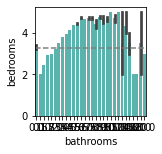


_____________________

fips 
_____________________

           chi2  p-value  degrees of freedom
0  50771.473286      0.0                   6

observed:
 bedrooms     2.0     3.0     4.0     5.0      All
fips                                             
6037.0    190926  467299  250677   60299   969201
6059.0     35369  162687  145793   33858   377707
6111.0      8008   45738   47665   11129   112540
All       234303  675724  444135  105286  1459448

expected:
                0              1              2             3
0  155597.665626  448739.781427  294944.448953  69919.103994
1   60637.914623  174878.231268  114942.703299  27248.150809
2   18067.419750   52105.987305   34247.847748   8118.745197


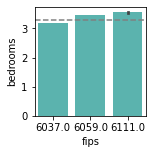


_____________________

year_built 
_____________________

            chi2  p-value  degrees of freedom
0  423295.920808      0.0                 441

observed:
 bedrooms       2.0     3.0     4.0     5.0      All
year_built                                         
1801.0           0       1       1       0        2
1807.0           0       1       0       0        1
1812.0           1       0       1       0        2
1823.0           0       1       0       0        1
1855.0           0       1       0       0        1
...            ...     ...     ...     ...      ...
2013.0         150     833    1591     675     3249
2014.0         188     741    1588     593     3110
2015.0          69     478    1348     538     2433
2016.0           1      13      29      10       53
All         234303  675724  444135  105286  1459448

[149 rows x 5 columns]

expected:
               0            1           2           3
0      0.321084     0.925999    0.608634    0.144282
1      0.160542    

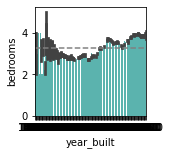


_____________________

area_sqft 
____________________



In [ ]:
cont_vars = ['area_sqft','tax_amount','tax_value']
cat_vars = ['bathrooms', 'fips', 'year_built']
explore.explore_bivariate(train, 'bedrooms', cat_vars, cont_vars)

In [ ]:
target = 'bedrooms'
explore.explore_multivariate(train, target, cat_vars, cont_vars)

In [ ]:
#Correlation tests are used to check if two features are correlated
r, p = stats.pearsonr(train.tax_value, train.area_sqft)
r,p

In [ ]:
r, p = stats.pearsonr(train.tax_value, train.bedrooms)
r,p

In [ ]:
r, p = stats.pearsonr(train.tax_value, train.bathrooms)
r,p

In [ ]:
r, p = stats.pearsonr(train.tax_value, train.fips)
r,p

In [ ]:
r, p = stats.pearsonr(train.tax_value, train.year_built)
r,p

# Takeaways <br>
- House value may be dependent upon area (sq ft)
- House value may be dependent upon number of bedrooms and bathrooms
- House value may be dependent upon location (fips)
- House value may be dependent upon year built